In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re

from torch.utils.data import DataLoader

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '9B'

In [3]:
profile_ids = [783214, 19568591, 25073877, 103018203, 256881576, 810619093749559296]

In [4]:
labels = list('ABCDEF')

In [5]:
dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='bag_of_words',
    task='target_testing'
)

In [6]:
dataloader = DataLoader(dataset)

In [7]:
distribution_df = pd.DataFrame.from_dict(
    {
        user_id: {
            target: len(
                [
                    entry
                    for _, entry in enumerate(dataloader)
                    if entry[1] == target and entry[2] == user_id
                ]
            )
            for target in set(dataset.y)
        }
        for user_id in profile_ids
    },
    orient='index'
)

In [8]:
distribution_df = distribution_df.rename(
    {
        0: 'Objectification of Women',
        1: 'Gender Equality',
        2: 'Conservatism'
    },
    axis='columns'
)

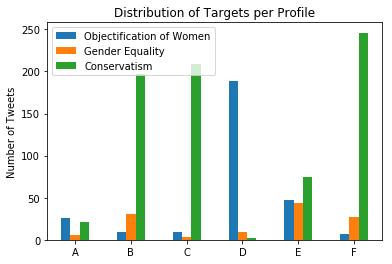

In [9]:
distribution_df.plot(
    kind='bar',
    rot=0
)

plt.title('Distribution of Targets per Profile')
plt.xticks(np.arange(len(labels)), labels)
plt.ylabel('Number of Tweets')
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_distribution.eps', 'wb') as f:
    plt.savefig(f, format='eps')